In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import pandas as pd

In [4]:
#from probability.probability_distribution import ProbabilityDistribution
from probability.new.joint_distribution import JointDistribution

distribution = [
    ['low',  'easy', 'A', 0.126],
    ['low',  'easy', 'B', 0.168],
    ['low',  'easy', 'C', 0.126],
    ['low',  'hard', 'A', 0.009],
    ['low',  'hard', 'B', 0.045],
    ['low',  'hard', 'C', 0.126],
    ['high', 'easy', 'A', 0.252],
    ['high', 'easy', 'B', 0.0224],
    ['high', 'easy', 'C', 0.0056],
    ['high', 'hard', 'A', 0.06],
    ['high', 'hard', 'B', 0.036],
    ['high', 'hard', 'C', 0.0024],
]

variables_names = ('Intelligence', 'Course Difficulty', 'Grade')

P = JointDistribution.from_list(distribution, variables_names)
P

Intelligence  Course Difficulty  Grade
high          easy               A        315/1223
                                 B         28/1223
                                 C          7/1223
              hard               A         75/1223
                                 B         45/1223
                                 C          3/1223
low           easy               A        315/2446
                                 B        210/1223
                                 C        315/2446
              hard               A         45/4892
                                 B        225/4892
                                 C        315/2446
Name: P(Intelligence, Course Difficulty, Grade), dtype: object

In [5]:
Intelligence, CourseDifficulty, Grade = P.variables

In [8]:
CPD = P(Grade | Intelligence, CourseDifficulty)

CPD.to_dataframe()

Grade                                  A         B         C
Course Difficulty Intelligence                              
easy              high          0.225000  0.020000  0.005000
                  low           0.075000  0.100000  0.075000
hard              high          0.152439  0.091463  0.006098
                  low           0.012500  0.062500  0.175000

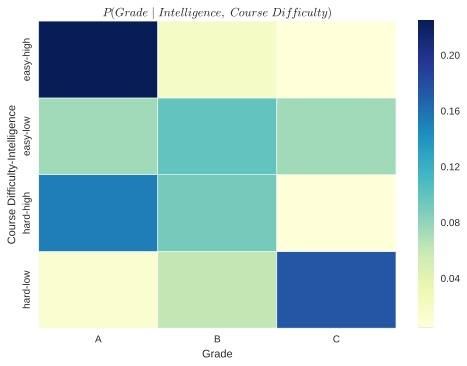

In [9]:
CPD.plot()

In [10]:
P('high', 'hard', {'A', 'C'})

Intelligence  Course Difficulty  Grade
high          hard               A        75/1223
                                 C         3/1223
Name: P(Intelligence, Course Difficulty, Grade), dtype: object

In [7]:
P(CourseDifficulty, Grade=={'A', 'C'})

Course Difficulty  Grade
easy               A        945/2446
                   C        329/2446
hard               A        345/4892
                   C        321/2446
Name: P(Intelligence, Course Difficulty, 'Grade'), dtype: object

In [51]:
P(Grade.given(Intelligence=={'high', 'low'}, CourseDifficulty))
#P(Grade | (Intelligence=='low'), CourseDifficulty)
#P(Grade.given(Intelligence=='low', CourseDifficulty))

Intelligence  Grade  Course Difficulty
low           A      easy                 0.30
                     hard                 0.40
              B      easy                 0.30
                     hard                 0.05
              C      easy                 0.25
                     hard                 0.70
Name: P(Grade | Intelligence = 'low', Course Difficulty), dtype: float64

In [52]:
P(Grade | Intelligence, CourseDifficulty) * P(Intelligence) * P(CourseDifficulty)

TypeError: unsupported operand type(s) for *: 'ConditionalDistribution' and 'ProbabilityDistribution'

---

In [ ]:
P_difficulty = ProbabilityDistribution.f